# IMPORT LIBRARIES

In [ ]:
#IMPORT REQUIRED LIBRARIES
!pip install -q mediapipe
from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2
import urllib
import cv2
from google.colab.patches import cv2_imshow
import math
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 30.5 MB/s eta 0:00:00


# DOWNLOAD MODELS

In [ ]:
#DOWNLOAD MODELS FROM GOOGLE STORAGE
!wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

# LOAD SUPPORTING FUNCTIONS

In [ ]:
# SUPPORTING FUNCTIONS TO PRINT THE IMAGE

from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[:rows*cols], gestures[:rows*cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
          hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
          hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
          ])

          mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks_proto,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

# INFER MODEL ON DATASET

In [ ]:
#DOWNLOAD PHOTOS FOR INFERENCE


import urllib

IMAGE_FILENAMES = ['thumbs_down.jpg', 'victory.jpg', 'thumbs_up.jpg', 'pointing_up.jpg']

for name in IMAGE_FILENAMES:
  url = f'https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/{name}'
  urllib.request.urlretrieve(url, name)

thumbs_down.jpg


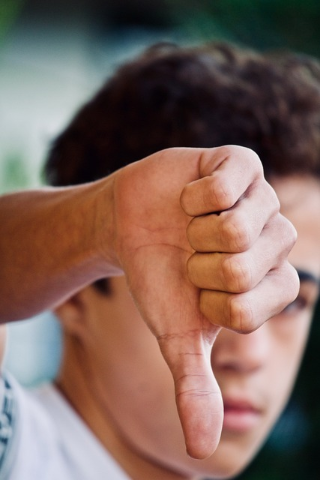

victory.jpg


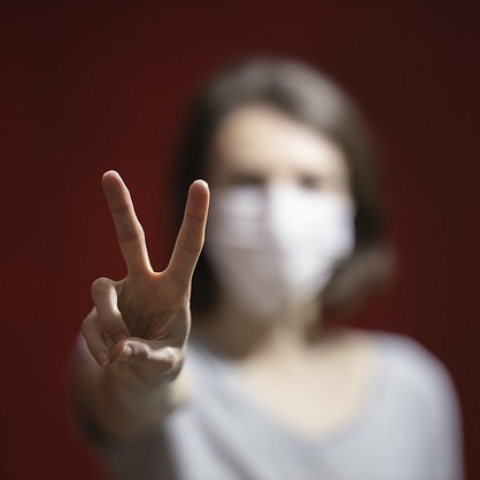

thumbs_up.jpg


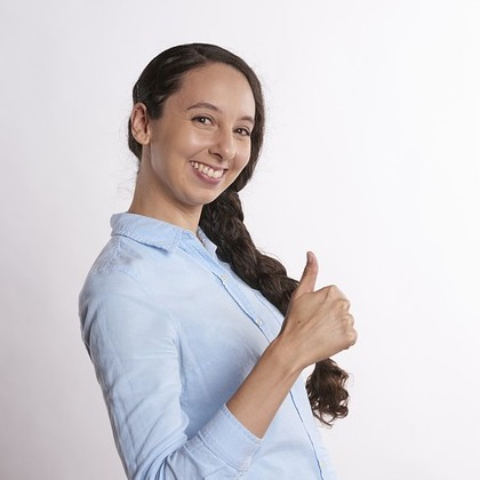

pointing_up.jpg


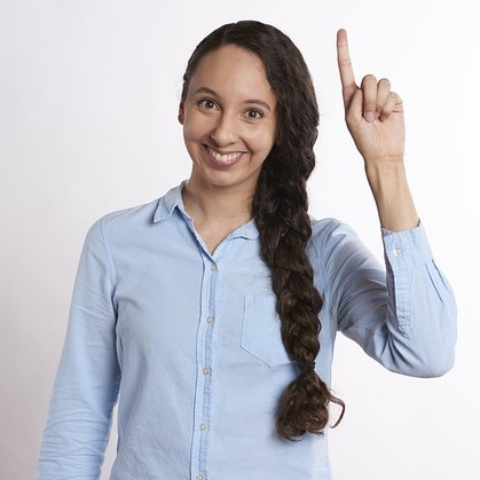

In [ ]:
#PRINT IMAGES


import cv2

from google.colab.patches import cv2_imshow
import math

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


# Preview the images.
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
  print(name)
  resize_and_show(image)

GestureRecognizerResult(gestures=[[Category(index=-1, score=0.7730880975723267, display_name='', category_name='Thumb_Down')]], handedness=[[Category(index=0, score=0.990321934223175, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.3775796592235565, y=0.4484468698501587, z=-7.658888421246957e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.45659855008125305, y=0.5906875729560852, z=-0.12274359911680222, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5610436201095581, y=0.7097854614257812, z=-0.21682056784629822, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6087026596069336, y=0.8151220083236694, z=-0.296338826417923, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6378511190414429, y=0.908829927444458, z=-0.35788753628730774, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.8904979825019836, y=0.6001406311988831, z=-0.19998541474342346, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7954009175300598, y=

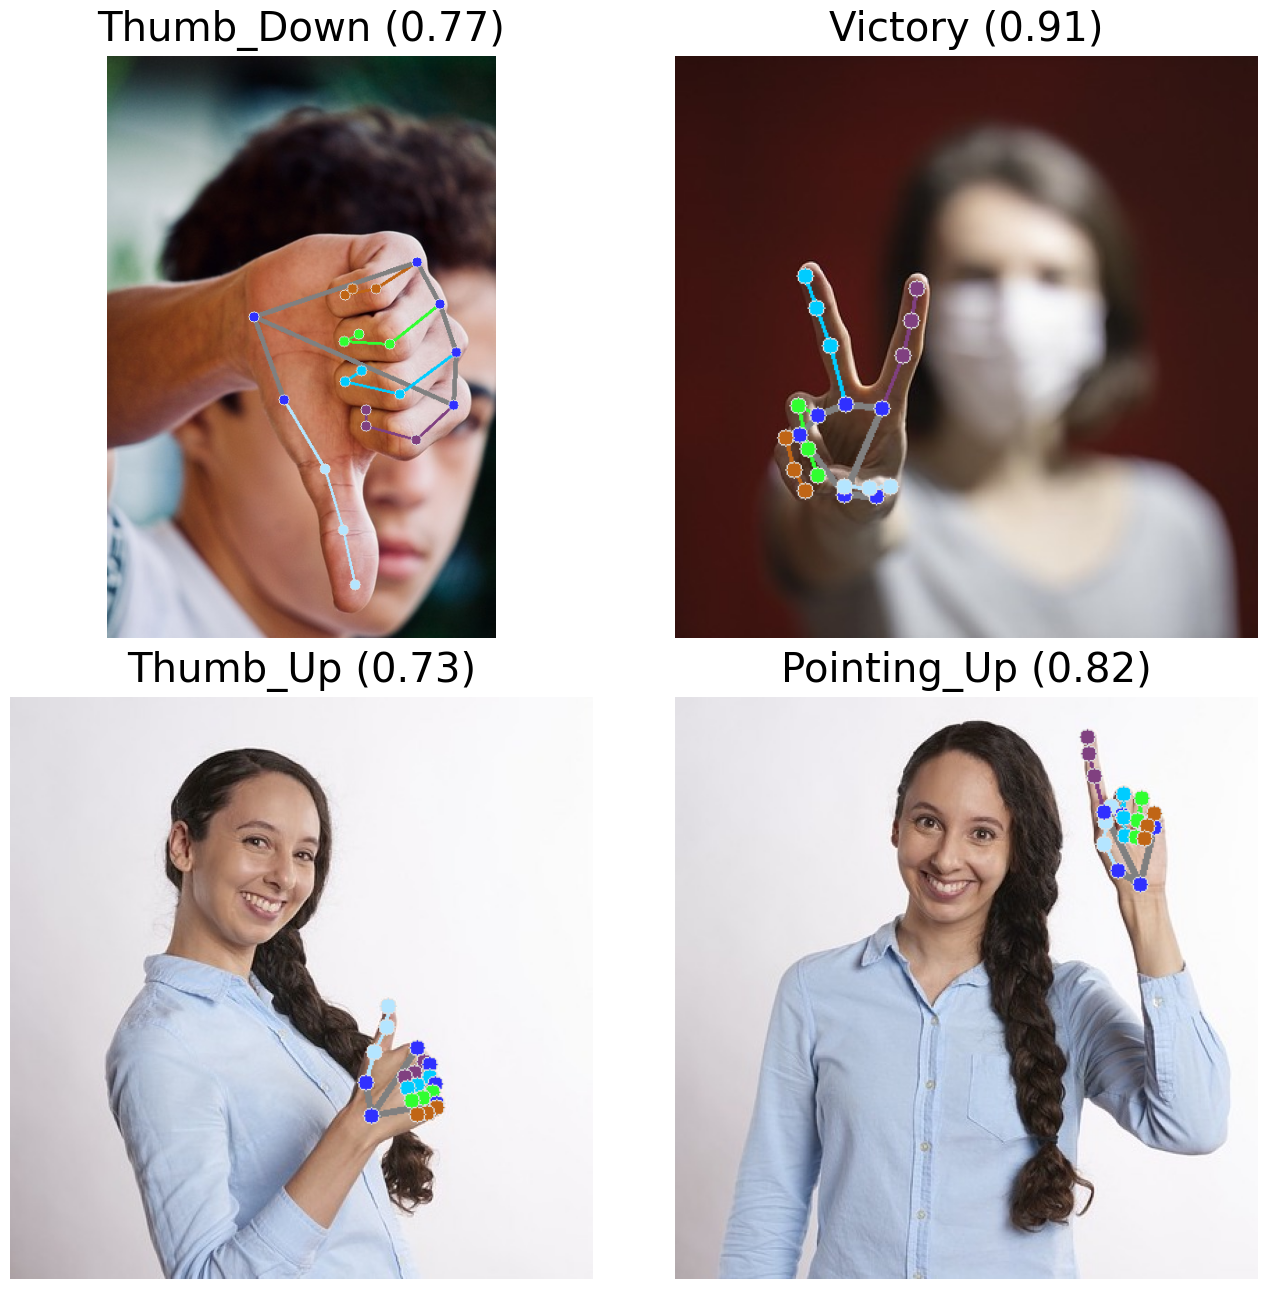

In [ ]:
#INFER MODEL


# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)
#IMAGE_FILENAMES.append('custom_image.png')
images = []
results = []
for image_file_name in IMAGE_FILENAMES:
  # STEP 3: Load the input image.
  image = mp.Image.create_from_file(image_file_name)

  # STEP 4: Recognize gestures in the input image.
  recognition_result = recognizer.recognize(image)
  print(recognition_result)
  # STEP 5: Process the result. In this case, visualize it.
  images.append(image)
  top_gesture = recognition_result.gestures[0][0]
  hand_landmarks = recognition_result.hand_landmarks
  results.append((top_gesture, hand_landmarks))
print(results)

display_batch_of_images_with_gestures_and_hand_landmarks(images, results)

# INFER ON REAL IMAGE

Saving IMG_1991.jpg to IMG_1991.jpg
Uploaded files: ['IMG_1991.jpg']
IMG_1991.jpg


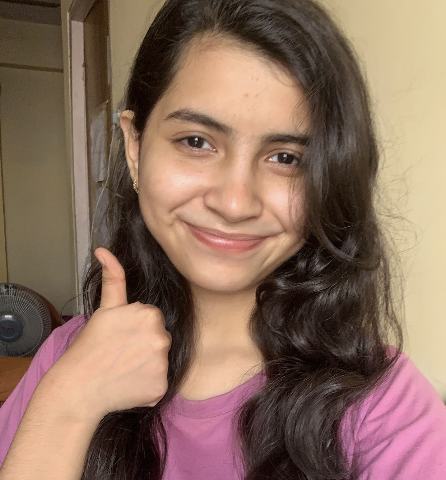

In [ ]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)
IMAGE_FILENAMES = list(uploaded.keys())

print('Uploaded files:', IMAGE_FILENAMES)


import cv2

from google.colab.patches import cv2_imshow
import math

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


# Preview the images.
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
  print(name)
  resize_and_show(image)

GestureRecognizerResult(gestures=[[Category(index=-1, score=0.7748883366584778, display_name='', category_name='Thumb_Up')]], handedness=[[Category(index=0, score=0.9902403354644775, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.18406492471694946, y=0.808655321598053, z=-5.289937234920217e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.1983494609594345, y=0.717487096786499, z=-0.009089810773730278, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.23875880241394043, y=0.6447799801826477, z=-0.026340240612626076, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.256540447473526, y=0.5811419486999512, z=-0.0425429604947567, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.23306284844875336, y=0.5296843647956848, z=-0.05809596925973892, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.34462663531303406, y=0.6543526649475098, z=-0.03211075812578201, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.35952821373939514

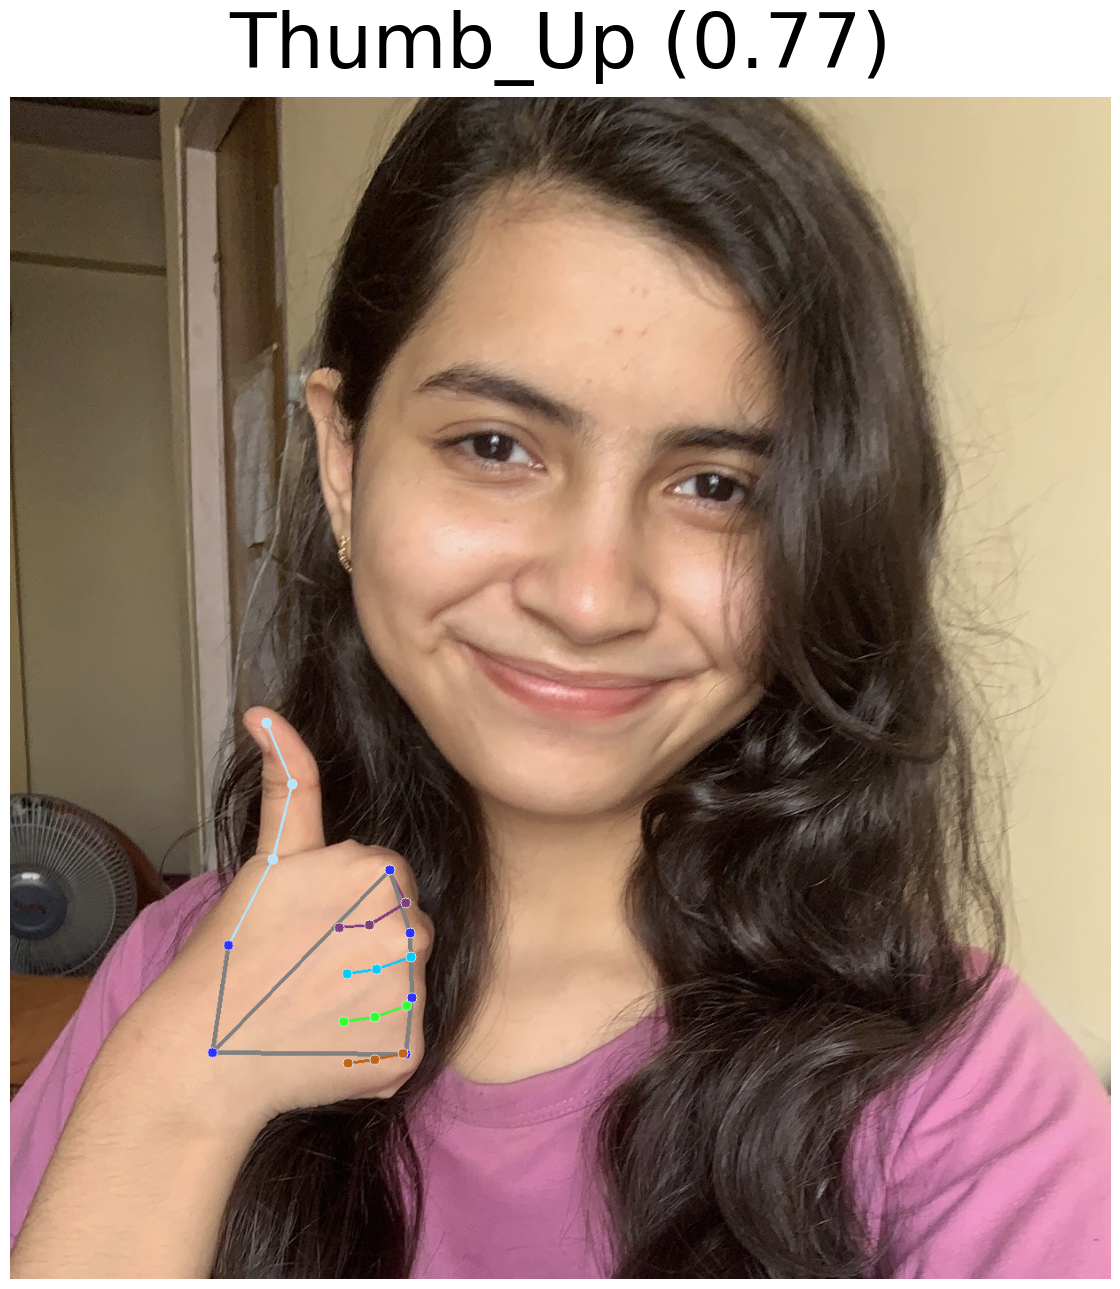

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)
#IMAGE_FILENAMES.append('custom_image.png')
images = []
results = []
for image_file_name in IMAGE_FILENAMES:
  # STEP 3: Load the input image.
  image = mp.Image.create_from_file(image_file_name)

  # STEP 4: Recognize gestures in the input image.
  recognition_result = recognizer.recognize(image)
  print(recognition_result)
  # STEP 5: Process the result. In this case, visualize it.
  images.append(image)
  top_gesture = recognition_result.gestures[0][0]
  hand_landmarks = recognition_result.hand_landmarks
  results.append((top_gesture, hand_landmarks))
print(results)

display_batch_of_images_with_gestures_and_hand_landmarks(images, results)